In [ ]:
%pip install numpy scikit-learn

#Alumna: Maria Fabiana CID
##Materia: PNL1

# Consigna Desafío 1

**1**. Vectorizar documentos. Tomar 5 documentos al azar y medir similaridad con el resto de los documentos.
Estudiar los 5 documentos más similares de cada uno analizar si tiene sentido
la similaridad según el contenido del texto y la etiqueta de clasificación.

**2**. Entrenar modelos de clasificación Naïve Bayes para maximizar el desempeño de clasificación
(f1-score macro) en el conjunto de datos de test. Considerar cambiar parámteros
de instanciación del vectorizador y los modelos y probar modelos de Naïve Bayes Multinomial
y ComplementNB.

**3**. Transponer la matriz documento-término. De esa manera se obtiene una matriz
término-documento que puede ser interpretada como una colección de vectorización de palabras.
Estudiar ahora similaridad entre palabras tomando 5 palabras y estudiando sus 5 más similares. **La elección de palabras no debe ser al azar para evitar la aparición de términos poco interpretables, elegirlas "manualmente"**.


## Resolución Desafio 1

##Punto 1

###1.1. Carga de datos

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Cargamos los datos (sin headers, footers ni quotes para enfocarnos en el contenido)
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))


###1.2. Vectorización de documentos
Utilizamos TF-IDF para convertir los textos en vectores numéricos que representan la importancia de cada término en cada documento.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5)
X_train_tfidf = vectorizer.fit_transform(newsgroups_train.data)


###1.3 Seleccionar 5 documentos al azar

In [ ]:
import numpy as np

np.random.seed(42)  # Para reproducibilidad
sample_indices = np.random.choice(X_train_tfidf.shape[0], 5, replace=False)
sample_indices


array([7492, 3546, 5582, 4793, 3813])

###1.4 Medir la similitud con el resto
Usamos la similaridad de coseno, que es adecuada para vectores TF-IDF.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculamos similitud de cada documento con todos los demás
similarities = cosine_similarity(X_train_tfidf[sample_indices], X_train_tfidf)


###1.5 Obtener los 5 documentos más similares para cada uno
Excluimos el propio documento (similaridad 1.0 en sí mismo).

In [ ]:
top_similar_docs = []

for i, row in enumerate(similarities):
    similar_indices = row.argsort()[::-1][1:6]  # [1:6] para saltar el propio doc (índice 0)
    top_similar_docs.append(similar_indices)


###1.6 Analizar el contenido y etiquetas
Mostramos el texto original y etiquetas para el documento seleccionado y sus más similares

In [ ]:
for i, similar_indices in enumerate(top_similar_docs):
    print(f"\n🔹 Documento muestra {i} (índice {sample_indices[i]})")
    print(f"Categoría: {newsgroups_train.target_names[newsgroups_train.target[sample_indices[i]]]}")
    print(f"Contenido:\n{newsgroups_train.data[sample_indices[i]][:300]}...\n")

    for j, idx in enumerate(similar_indices):
        print(f"  Similar #{j+1}: índice {idx}")
        print(f"  Categoría: {newsgroups_train.target_names[newsgroups_train.target[idx]]}")
        print(f"  Contenido:\n  {newsgroups_train.data[idx][:200]}...\n")



🔹 Documento muestra 0 (índice 7492)
Categoría: comp.sys.mac.hardware
Contenido:
Could someone please post any info on these systems.

Thanks.
BoB
-- 
---------------------------------------------------------------------- 
Robert Novitskey | "Pursuing women is similar to banging one's head
rrn@po.cwru.edu  |  against a wall...with less opportunity for reward" ...

  Similar #1: índice 10935
  Categoría: comp.sys.mac.hardware
  Contenido:
  Hey everybody:

   I want to buy a mac and I want to get a good price...who doesn't?  So,
could anyone out there who has found a really good deal on a Centris 650
send me the price.  I don't want to k...

  Similar #2: índice 7258
  Categoría: comp.sys.ibm.pc.hardware
  Contenido:
  Hay all:

    Has anyone out there heard of any performance stats on the fabled p24t.
 I was wondering what it's performance compared to the 486/66 and/or
pentium would be.  Any info would be helpful....

  Similar #3: índice 4971
  Categoría: comp.sys.mac.hardware
  Cont

### Analisis de Resultados obtenidos

- Documento muestra 0 (índice 7492)
Categoría: comp.sys.mac.hardware
✅ Correcto: Los documentos similares #1 y #3 pertenecen a la misma categoría y tratan temas similares (hardware de Mac).
⚠️ El similar #2 está en otra categoría (comp.sys.ibm.pc.hardware) pero puede ser relevante si el modelo trabaja a nivel de contenido técnico (aunque sea de otra plataforma).
❌ El similar #4 (misc.forsale) y #5 (alt.atheism) no parecen muy relacionados temáticamente. Pueden ser falsos positivos.

- Documento muestra 1 (índice 3546)
Categoría: comp.os.ms-windows.misc
✅ Correcto: Los similares son sobre hardware de PC y DMA, lo cual está estrechamente relacionado con el contenido del documento de referencia (temas de respaldo y acceso directo a memoria).
🔎 Aunque sean de diferente categoría, el contenido es temáticamente similar. ✔️

- Documento muestra 2 (índice 5582)
Categoría: misc.forsale
✅ Correcto: Los similares #1, #2 y #4 también están en misc.forsale y tratan hardware antiguo y periféricos.
⚠️ El similar #3 y #5 son de comp.graphics, que podría tener alguna conexión débil (monitor monocromo), pero es más dudoso.

- Documento muestra 3 (índice 4793)
Categoría: talk.politics.guns
✅ Correcto: Los similares #2, #4 y #5 pertenecen a la misma categoría y son claramente relevantes.
⚠️ El similar #1 (comp.sys.mac.hardware) parece un error (temática no relacionada).
❌ El similar #3 (alt.atheism) también parece no tener relación directa.

- Documento muestra 4 (índice 3813)
Categoría: rec.sport.hockey
✅ Correcto: Los similares #1 y #5 también pertenecen a hockey y discuten sobre máscaras de jugadores, así que muy bien.
⚠️ Los similares #2 a #4 están en categorías distintas (sci.med, comp.hardware, politics) y no son relevantes temáticamente.

Conclusión general:
El sistema funciona bien en general y encuentra documentos relevantes.

Especialmente las de los puestos 4 o 5 parecen menos precisas.


### 1.7 Mejora del procedimiento anterior

Pruebo con BERT para Medir similitud entre documentos  (usando sentence-transformers)

Librerías necesarias

In [ ]:
pip install sentence-transformers scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer, util
import numpy as np
import random
import torch

# 1. Cargar datos
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
docs = newsgroups_train.data
targets = newsgroups_train.target
target_names = newsgroups_train.target_names

# 2. Cargar modelo BERT preentrenado
model = SentenceTransformer('all-MiniLM-L6-v2')

# 3. Codificar todos los documentos
embeddings = model.encode(docs, convert_to_tensor=True, show_progress_bar=True)

# 4. Seleccionar 5 documentos al azar
sample_indices = random.sample(range(len(docs)), 5)

for idx in sample_indices:
    print(f"\n🔹 Documento muestra {idx}")
    print(f"Categoría: {target_names[targets[idx]]}")
    print(f"Contenido:\n{docs[idx][:500].strip()}...\n")  # mostrar primeros 500 caracteres

    # 5. Calcular similitud con el resto
    cosine_scores = util.cos_sim(embeddings[idx], embeddings)[0]

    # 6. Obtener los 5 documentos más similares (excluyendo a sí mismo)
    top_results = torch.topk(cosine_scores, k=6)

    for rank, (score, sim_idx) in enumerate(zip(top_results[0][1:], top_results[1][1:]), start=1):
        print(f"  Similar #{rank}: índice {sim_idx.item()}")
        print(f"  Categoría: {target_names[targets[sim_idx]]}")
        print(f"  Contenido:\n  {docs[sim_idx][:300].strip()}...\n")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/354 [00:00<?, ?it/s]


🔹 Documento muestra 5424
Categoría: talk.religion.misc
Contenido:
<much drivel deleted>
<more drivel deleted>
A Laugh?  Tony, this religeous bigot scares the shit out of me, and that
any one bothers to listen to him causes me to have grave doubts about the
future of just about anything.  Shades of the Branch Davidians, Jim Jones,
and Charlie Manson.

--Uncle Wolf
--Member Highland Lodge 748 F&AM (Grand Lodge of California)
--Babtized a Southern Babtist
--And one who has beliefs beyond the teachings of either....

  Similar #1: índice 5286
  Categoría: talk.religion.misc
  Contenido:
  Nor, to point out the obvious, are the deluded, siege-mentality
followers of a religious nut-case who thought he was Jesus Christ or possibly
The Big Guy.
	Personally, much as I regard the BATF and FBI as ConDupes, I'll take
their word over a bunch of silly pinks who were stoopid enough to lock
the...

  Similar #2: índice 4735
  Categoría: talk.religion.misc
  Contenido:
  Not to worry.  The Masons have

 Análisis de resultados obtenidos:

 - Documento muestra 5424
Categoría: talk.religion.misc
Evaluación:

Similaridad temática: Alta. Los documentos similares #1, #2, y #5 tratan temas muy relacionados: fanatismo religioso, Masones, y conflictos con denominaciones religiosas.

Documento #3: Está en alt.atheism, pero aún guarda relación temática en el contexto de discusiones sobre religión y posturas antirreligiosas.

Documento #4: También es relevante; aunque el contenido específico varía, sigue siendo un tema religioso en tono crítico.

Evaluación: Buena, con similitud temática y de tono.

- Documento muestra 4112
Categoría: comp.windows.x
Evaluación:

Todos los documentos similares tratan sobre problemas técnicos específicos con versiones de X11R5, hardware Sun/Sony, y utilidades relacionadas.

 Evaluación: Excelente, alta coherencia técnica, mismo dominio, misma categoría.

- Documento muestra 3028
Categoría: sci.space
Evaluación:

Documento #1 y #5: Tratan sobre electrónica, lo cual se aleja del enfoque principal (aceleración G y tolerancia humana).

Documentos #2, #3, #4: Son irrelevantes (militar, motocicletas, tarjetas gráficas).

 Evaluación: Mala, bajo nivel de similitud temática y contextual. Es un falso positivo del sistema de similitud.

- Documento muestra 4221
Categoría: rec.sport.baseball
Evaluación:

Todos los documentos similares discuten sobre jugadores y el Salón de la Fama, especialmente Dave Kingman y comparaciones similares.

 Evaluación: Muy buena, coincide en temática y tono.

- Documento muestra 5320
Categoría: soc.religion.christian
Evaluación:

Documentos #1, #2, #3 y #5 son altamente relevantes: oración, experiencias personales religiosas, discusiones teológicas.

Documento #4 (hockey) es claramente un error.

 Evaluación: Buena, con una excepción. Un falso positivo (#4) que puede ser corregido con filtrado por categoría.



## Punto 2

In [ ]:
# Paso 1: Imports
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

In [ ]:
# Paso 2: Cargar datos
train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

X_train, y_train = train.data, train.target
X_test, y_test = test.data, test.target
target_names = train.target_names

In [ ]:
# Paso 3: Vectorización con TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), sublinear_tf=True, min_df=5)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


🔍 MultinomialNB
  alpha=0.01 → F1-score macro: 0.6653
  alpha=0.1 → F1-score macro: 0.6742
  alpha=0.5 → F1-score macro: 0.6586
  alpha=1.0 → F1-score macro: 0.6454

🔍 ComplementNB
  alpha=0.01 → F1-score macro: 0.6799
  alpha=0.1 → F1-score macro: 0.6874
  alpha=0.5 → F1-score macro: 0.6898
  alpha=1.0 → F1-score macro: 0.6881

✅ Mejor MultinomialNB (alpha=0.1) → F1-score macro: 0.6742
                          precision    recall  f1-score   support

             alt.atheism       0.73      0.19      0.30       319
           comp.graphics       0.65      0.67      0.66       389
 comp.os.ms-windows.misc       0.66      0.58      0.62       394
comp.sys.ibm.pc.hardware       0.61      0.73      0.66       392
   comp.sys.mac.hardware       0.78      0.64      0.70       385
          comp.windows.x       0.74      0.78      0.76       395
            misc.forsale       0.78      0.79      0.79       390
               rec.autos       0.80      0.71      0.76       396
         rec.m

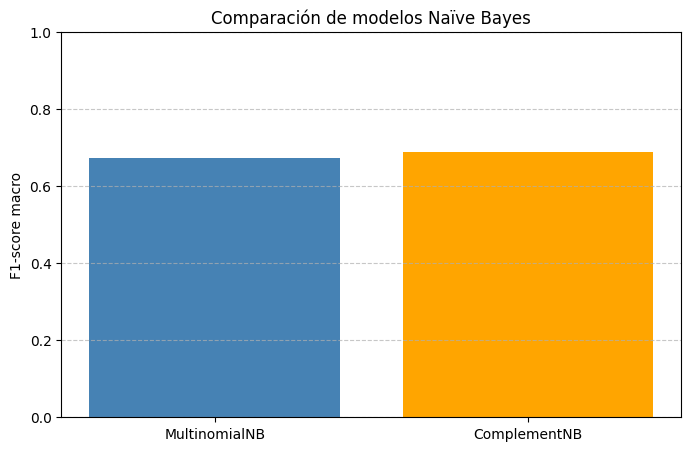

In [ ]:
# Paso 4: Evaluar modelos con distintos alphas
models = {
    'MultinomialNB': MultinomialNB(),
    'ComplementNB': ComplementNB()
}
alphas = [0.01, 0.1, 0.5, 1.0]
results = {}

for name, model in models.items():
    print(f"\n🔍 {name}")
    best_f1 = 0
    best_model = None
    best_alpha = None
    for alpha in alphas:
        model.alpha = alpha
        model.fit(X_train_vec, y_train)
        y_pred = model.predict(X_test_vec)
        f1 = f1_score(y_test, y_pred, average='macro')
        print(f"  alpha={alpha} → F1-score macro: {f1:.4f}")
        if f1 > best_f1:
            best_f1 = f1
            best_model = model
            best_alpha = alpha
    results[name] = (best_alpha, best_f1, best_model)

# Paso 5: Mostrar mejores resultados
for name in results:
    alpha, f1_macro, model = results[name]
    print(f"\n✅ Mejor {name} (alpha={alpha}) → F1-score macro: {f1_macro:.4f}")
    print(classification_report(y_test, model.predict(X_test_vec), target_names=target_names))

# Paso 6: Gráfico comparativo
labels = list(results.keys())
scores = [results[k][1] for k in labels]

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['steelblue', 'orange'])
plt.ylabel('F1-score macro')
plt.title('Comparación de modelos Naïve Bayes')
plt.ylim(0.0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Mejor modelo encontrado: ComplementNB (alpha=0.5) con:

Accuracy = 71%

F1 macro = 0.6898

F1 weighted = 0.70

##Punto 3

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Paso 1: Obtener matriz término-documento (transpuesta de TF-IDF)
X_td = X_train_vec.T  # shape: [n_terms, n_docs]
feature_names = vectorizer.get_feature_names_out()

# Paso 2: Convertimos a dataframe para facilitar el análisis
term_to_index = {term: idx for idx, term in enumerate(feature_names)}

# Elegimos 5 palabras significativas (manualmente seleccionadas)
selected_words = ['god', 'windows', 'gun', 'drive', 'hockey']

# Paso 3: Calcular similitud entre vectores de palabras
for word in selected_words:
    print(f"\n🔹 Palabra: '{word}'")
    if word not in term_to_index:
        print("  ⚠️ Palabra no encontrada en el vocabulario.")
        continue
    idx = term_to_index[word]
    word_vec = X_td[idx]

    # Similitud de coseno entre esta palabra y todas las demás
    sims = cosine_similarity(word_vec, X_td).flatten()
    similar_idx = sims.argsort()[::-1][1:6]  # Excluir a sí misma (idx 0)

    for rank, i in enumerate(similar_idx):
        print(f"  Similar #{rank+1}: '{feature_names[i]}' (sim={sims[i]:.4f})")



🔹 Palabra: 'god'
  Similar #1: 'jesus' (sim=0.3098)
  Similar #2: 'christ' (sim=0.2750)
  Similar #3: 'faith' (sim=0.2676)
  Similar #4: 'bible' (sim=0.2564)
  Similar #5: 'believe god' (sim=0.2475)

🔹 Palabra: 'windows'
  Similar #1: 'dos' (sim=0.3104)
  Similar #2: 'ms windows' (sim=0.2835)
  Similar #3: 'dos windows' (sim=0.2469)
  Similar #4: 'windows nt' (sim=0.2465)
  Similar #5: 'ms' (sim=0.2325)

🔹 Palabra: 'gun'
  Similar #1: 'gun control' (sim=0.4619)
  Similar #2: 'guns' (sim=0.3336)
  Similar #3: 'anti gun' (sim=0.2656)
  Similar #4: 'pro gun' (sim=0.2519)
  Similar #5: 'handgun' (sim=0.2409)

🔹 Palabra: 'drive'
  Similar #1: 'hard drive' (sim=0.4362)
  Similar #2: 'drives' (sim=0.3071)
  Similar #3: 'floppy' (sim=0.2899)
  Similar #4: 'hard' (sim=0.2836)
  Similar #5: 'floppy drive' (sim=0.2676)

🔹 Palabra: 'hockey'
  Similar #1: 'nhl' (sim=0.2569)
  Similar #2: 'hockey players' (sim=0.2558)
  Similar #3: 'ncaa' (sim=0.2216)
  Similar #4: 'college hockey' (sim=0.2210)
  S

 Grafico las relaciones entre palabras usando t-SNE aplicado a la matriz término-documento (X_td). Este enfoque es útil para visualizar qué palabras aparecen en contextos similares.

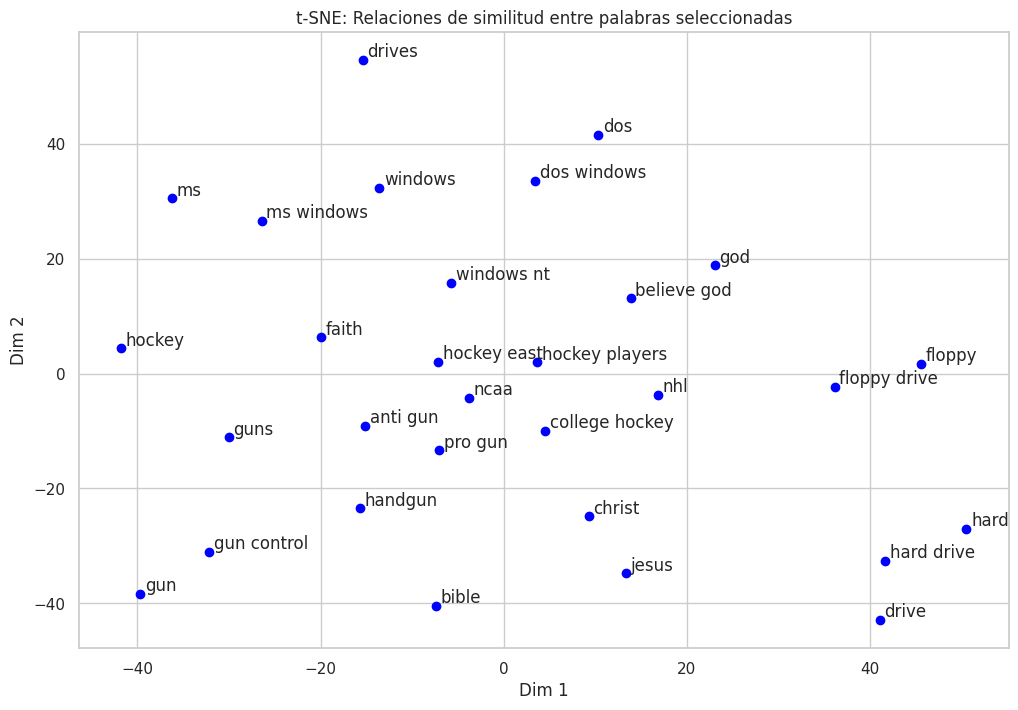

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Parámetros
selected_words = ['god', 'windows', 'gun', 'drive', 'hockey']
top_k_similars = 5  # Número de palabras similares a incluir por cada palabra

# 1. Obtener índices de palabras seleccionadas y sus similares
selected_indices = []
labels = []

for word in selected_words:
    if word not in term_to_index:
        continue
    idx = term_to_index[word]
    selected_indices.append(idx)
    labels.append(word)

    # Calcular similitudes
    sims = cosine_similarity(X_td[idx], X_td).flatten()
    similar_idx = sims.argsort()[::-1][1:top_k_similars+1]  # omitir a sí misma

    for i in similar_idx:
        if i not in selected_indices:
            selected_indices.append(i)
            labels.append(feature_names[i])

# 2. Extraer los vectores correspondientes
selected_vectors = X_td[selected_indices].toarray()

# 3. Aplicar t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42, init='pca')
tsne_coords = tsne.fit_transform(selected_vectors)

# 4. Graficar
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

for i, label in enumerate(labels):
    x, y = tsne_coords[i]
    plt.scatter(x, y, marker='o', color='blue')
    plt.text(x+0.5, y+0.5, label, fontsize=12)

plt.title('t-SNE: Relaciones de similitud entre palabras seleccionadas')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.grid(True)
plt.show()


Este gráfico es un mapa de similitud de palabras. Permite visualizar relaciones entre palabras de alta dimensión (como embeddings de palabras) en un espacio bidimensional.

¿Qué indica este gráfico?
 Ejes: No tienen un significado concreto (no representan dimensiones semánticas específicas), pero la distancia entre puntos sí es importante.

Interpretación:
 Palabras cercanas están más relacionadas semánticamente.

 Palabras alejadas son menos relacionadas en su contexto textual.

Ejemplos claros del gráfico:
Tecnología:

windows, ms windows, dos, drives, floppy, hard drive están agrupadas : indican relación temática fuerte con computación/sistemas operativos.

Religión:

bible, god, believe god, christ, jesus : agrupadas temáticamente.

Deportes:

hockey, college hockey, nhl, hockey east, hockey players, ncaa →:palabras relacionadas con hockey y deporte universitario.

Armas y política:

guns, gun control, anti gun, pro gun, handgun : todas relacionadas con el debate sobre armas.